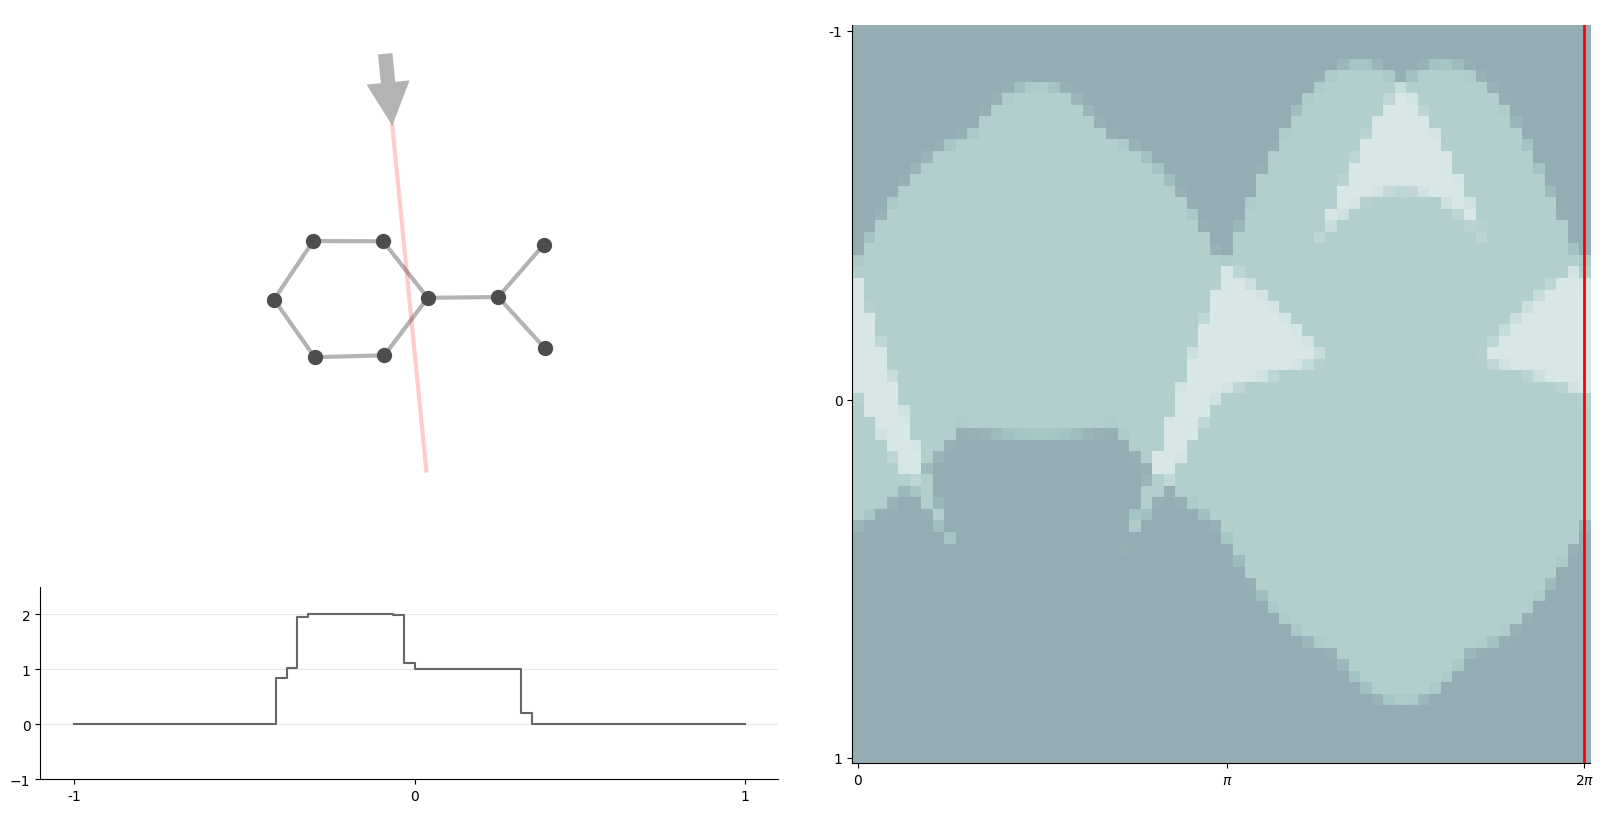

In [1]:
# %%
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

from torch_geometric.data import Data, Batch
from models.layers.layers import EctLayer, EctConfig
import torch

plt.rcParams["animation.html"] = "jshtml"

layer = EctLayer(EctConfig(num_thetas=64,bump_steps=64,ect_type="edges",device="cpu"),fixed=True)

global pos
global ect
global ect_viz 

G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,0)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(6,8)


# # explicitly set positions
# pos_dict = {0: (0, 0), 1: (-.1, 0.3), 2: (.2, 0.17), 3: (.4, 0.255), 4: (.5, 0.03)}

# pos = np.vstack(list(pos_dict.values()))
# # pos = np.random.uniform(low=-1,high=1,size=(5,2))

pos = np.array([[-0.18932449,  0.41043375],
       [-0.69471464,  0.41272726],
       [-0.97862305, -0.01084862],
       [-0.6853928 , -0.42802579],
       [-0.18017702, -0.41453306],
       [ 0.13328853,  0.00147709],
       [ 0.6431185 ,  0.00713217],
       [ 0.98004469, -0.36219833],
       [ 0.97178028,  0.38383553]])

pos -= pos.mean()
pos /= np.linalg.norm(pos,axis=1).max()
ei = np.array(G.edges).T



ect_viz = np.zeros((64,64))


batch = Batch.from_data_list([Data(
    x=torch.tensor(pos,dtype=torch.float), edge_index=torch.tensor(ei))])

ect = layer(batch).numpy().squeeze()



def get_rot_mat(phi):
    return np.array([[np.sin(phi),np.cos(phi)],
                     [-1*np.cos(phi),np.sin(phi)]])


# First set up the figure, the axis, and the plot element we want to animate
fig, axd = plt.subplot_mosaic([['A','B'],
                               ['C','B']],
                              figsize=(20, 10),
                              height_ratios=[3,1])
                            #   height_ratios=[2,1])


fig.subplots_adjust(wspace=0.1, hspace=0)
# initialization function: plot the background of each frame
def init():
    # # nx.draw(G,pos=pos, ax=ax)
    # # line.set_offsets(np.array([[1.0,0.0]]))
    # axes[0,1].imshow(ect)
    return None,


# animation function.  This is called sequentially
def animate(i):

    theta = np.linspace(0,2*np.pi, 64,endpoint=False)
    R = get_rot_mat(theta[i])
    A = np.array([[1.7,0],[-.5,0]]) @ R
    L = np.array([[-1.2,0],[1.2,0]]) @ R
    
    ect_viz[:,i] = ect[:,i]
    
    # Plot Graph 

    ax = axd["A"]
    ax.set_aspect(1)
    ax.clear()
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    
    ax.arrow(A[0,0],A[0,1],A[1,0],A[1,1],
             width = 0.1,
            lw=0,
            fc=".7",
            #  alpha = .5,
            length_includes_head=True,
            head_length=.3,
            shape="full")#,,lw=1)

    ax.plot(L[:,0],L[:,1],color="red",alpha=.2,lw=3)
    nx.draw(G, node_size=100, ax=ax, pos= pos, node_color=".3",edge_color=".7",width=3)

    
    ax = axd["B"]
    ax.clear()
    ax.set_aspect(1)
    ax.imshow(ect_viz,cmap="bone",vmin=-6,vmax=3)
    ax.set_xticks([0,32,63],["0","$\pi$","$2\pi$"])
    ax.set_yticks([0,32,63],[-1,0,1])
    ax.axvline(x=i,color="red",linewidth=2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # axes[0,1].axis("off")

    ax = axd["C"]
    ax.clear()
    # ax.axis('square')
    ax.set_ylim([ect.min()-.5,ect.max()+.5])
    ax.step(range(64),ect[:,i],color=".4")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([0,32,63],[-1,0,1])
    ax.set_yticks(list(range(int(ect.min())-1,int(ect.max())+1)))
    ax.grid(axis="y",color = ".9")
    # ax.axis("off")

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, 
                               animate, 
                               init_func=init,
                               frames=64, 
                               interval=80,
                               )

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.gif', fps=12)
anim

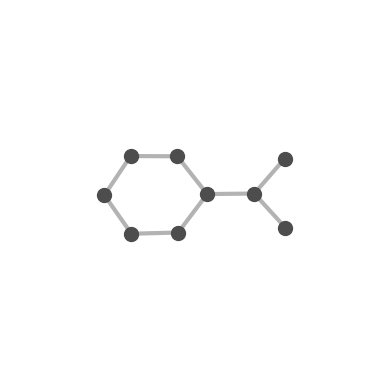

In [21]:

# %%
# G = nx.complete_graph(4)
# pos_dict = nx.spring_layout(G)

G = nx.Graph()
# G.add_edge(1, 2)
# G.add_edge(1, 3)
# G.add_edge(1, 5)
# G.add_edge(2, 3)
# G.add_edge(3, 4)
# G.add_edge(4, 5)


G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,0)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(6,8)

pos_dict = nx.kamada_kawai_layout(G)
pos = np.vstack(list(pos_dict.values()))
pos = pos @ get_rot_mat( .06)

# pos = np.random.uniform(low=-1,high=1,size=(5,2))
# pos -= pos.mean()
# pos /= np.linalg.norm(pos,axis=0)



fig, ax = plt.subplots()

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_aspect(1)
nx.draw(G, node_size=100, ax=ax, pos= pos, node_color=".3",edge_color=".7",width=3)



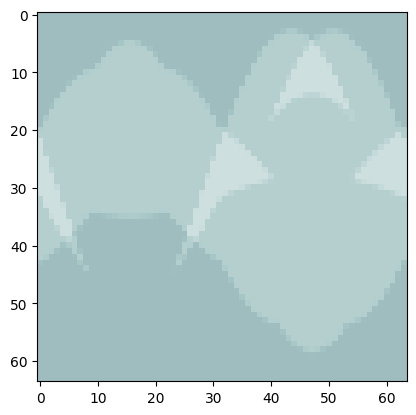

In [31]:
plt.imshow(ect_viz,cmap="bone",vmin=-10,vmax=4)

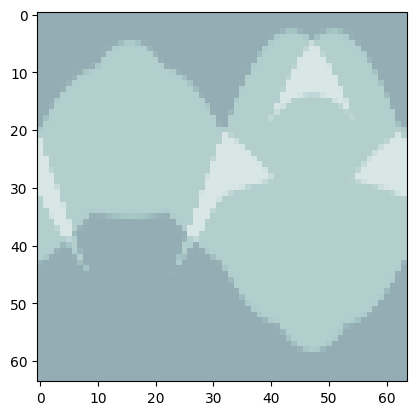

In [40]:
plt.imshow(ect_viz,cmap="bone",vmin=-6,vmax=3)

Text(0.5, 1.0, 'ReLU Function')

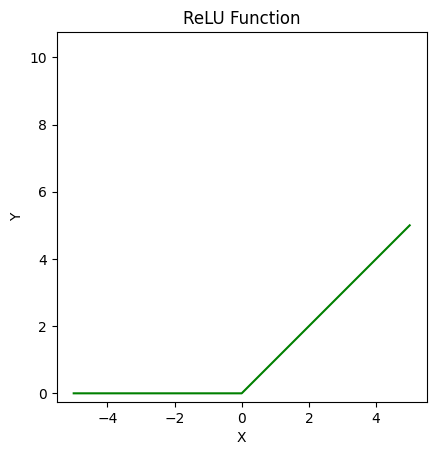

In [18]:
# importing module
import matplotlib.pyplot as plt
 
# assigning x and y coordinates
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y = []
 
for i in range(len(x)):
    y.append(max(0, x[i]))
 
# depicting the visualization
plt.plot(x, y, color='green')
plt.xlabel('X')
plt.ylabel('Y')
 
# square plot
plt.axis('square')
 
# displaying the title
plt.title('ReLU Function')